<center>
<img src="./img/logos2021.png" width="600px"/>

---
## Introdução à Análise de Dados Geoespaciais com Python
# ENUCOMPI & SINFO 2021
</center>

---

__Conteúdo:__

- Introdução
- Dados Vetoriais
- GeoPandas
- Sistemas de Coordenadas
- Projeções Espaciais
- Relações e operações espaciais
- Visualização de dados geoespaciais

## **Ferramentas e bibliotecas**

<center>
    <img src="./img/ferramentas.png" width=80%/>
</center>

* [Google Colab ](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjRgtCVrqDqAhUUKLkGHc6jDnQQFjAAegQIARAC&url=https%3A%2F%2Fcolab.research.google.com%2F&usg=AOvVaw3A5aPK2kLFzKOzb6sOckVw): serviço de nuvem gratuito hospedado pelo Google para incentivar a pesquisa de Aprendizado de Máquina e Inteligência Artificial;




### Referências sobre a biblioteca **pandas** e **matplotlib**:

* [pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) é uma biblioteca para análise de dados em Python, de código aberto, licenciada por BSD, utiliza o conceito de dataframes que funcionam como uma matriz de dados, formada por linhas e colunas.

* Documentação da biblioteca [matplotlib](https://matplotlib.org/).

* Ciência de Dados com Reprodutibilidade usando Jupyter, disponível: https://doi.org/10.5753/sbc.6757.3.1

* Introdução a análise de dados com python e pandas, disponívei em: http://www.enucomp.com.br/2017/enucomp_anaisX_2017.pdf

* Introdução à Análise Exploratória de Dados com Python, disponível em https://ercas2019.enucompi.com.br/doc/livro_de_minicursos_ercas_pi_2019.pdf


## Geopandas

O GeoPandas é um projeto open source que foi criado para tornar a manipulação de dados geoespaciais em Python uma tarefa mais simples. Ele estende as estruturas de dados do Pandas, que são o dataframe e o series, possibilitando a manipulação e tratamento de arquivos dessa natureza.

A estrutura de dados central do GeoPandas é \$\verb!geopandas.GeoDataFrame!$, uma subclasse do pandas.DataFrame capaz de armazenar colunas geométricas e realizar operações espaciais. As geometrias são tratadas como \verb!geopandas.GeoSeries!, uma subclasse de \$\verb!pandas.Series!$. Portanto, seu GeoDataFrame é uma combinação de Series com seus dados (numéricos, booleanos, texto etc.) e GeoSeries com geometrias (pontos, polígonos e etc.)

<center>
    <img src="./img/dataframe.svg" width=80%/>
</center>

## Bibliotecas necessárias

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

## Importando dados geoespaciais

Os dados geoespaciais estão frequentemente disponíveis em formatos de arquivos GIS específicos ou armazenamentos de dados, como arquivos de forma ESRI, arquivos GeoJSON, arquivos de geopacote, banco de dados PostGIS (PostgreSQL), dentre outros.

Para este minicurso, iremos utilizar a melha de setores censitários do estado do Piauí disponibilizados pelo IBGE.


In [2]:
url_setores_censitarios_pi_ibge = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/2020/Malha_de_setores_(shp)_por_UFs/PI/PI_Setores_2020.zip"

In [3]:
setores_censitarios_pi = gpd.read_file(url_setores_censitarios_pi_ibge)
setores_censitarios_pi.head(2)

CD_SETOR CD_SIT                                        NM_SIT CD_UF  \
0  220005305000001      1  Área Urbana de Alta Densidade de Edificações    22   
1  220005305000002      8            Área Rural (exclusive aglomerados)    22   

   NM_UF SIGLA_UF   CD_MUN NM_MUN    CD_DIST NM_DIST   CD_SUBDIST NM_SUBDIST  \
0  Piauí       PI  2200053  Acauã  220005305   Acauã  22000530500       None   
1  Piauí       PI  2200053  Acauã  220005305   Acauã  22000530500       None   

                                            geometry  
0  POLYGON ((-41.08058 -8.21775, -41.08105 -8.218...  
1  POLYGON ((-40.85118 -8.17031, -40.85080 -8.170...

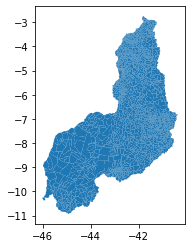

In [5]:
setores_censitarios_pi.plot();

In [6]:
setores_censitarios_pi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7107 entries, 0 to 7106
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_SETOR    7107 non-null   object  
 1   CD_SIT      7107 non-null   object  
 2   NM_SIT      7107 non-null   object  
 3   CD_UF       7107 non-null   object  
 4   NM_UF       7107 non-null   object  
 5   SIGLA_UF    7107 non-null   object  
 6   CD_MUN      7107 non-null   object  
 7   NM_MUN      7107 non-null   object  
 8   CD_DIST     7107 non-null   object  
 9   NM_DIST     7107 non-null   object  
 10  CD_SUBDIST  7107 non-null   object  
 11  NM_SUBDIST  1335 non-null   object  
 12  geometry    7107 non-null   geometry
dtypes: geometry(1), object(12)
memory usage: 721.9+ KB


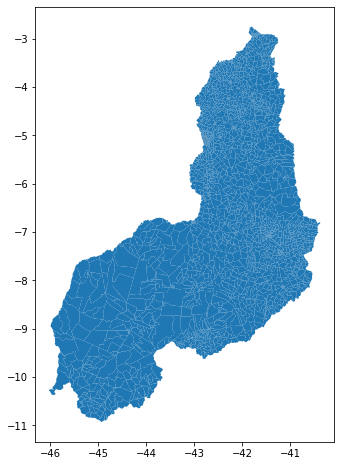

In [7]:
setores_censitarios_pi.plot(figsize=(18,8));

O que podemos observar:

- Usando `.head()` podemos ver as primeiras linhas do conjunto de dados, assim como é feito no Pandas.
- Existe uma coluna `geometry` e os diferentes setores censitários são representados como polígonos.
- É possível usar o método `.plot()` para obter rapidamente uma visualização *básica* dos dados.

In [8]:
setores_censitarios_pi.geometry

0       POLYGON ((-41.08058 -8.21775, -41.08105 -8.218...
1       POLYGON ((-40.85118 -8.17031, -40.85080 -8.170...
2       POLYGON ((-40.78822 -8.22331, -40.78802 -8.223...
3       POLYGON ((-40.88414 -8.23197, -40.88462 -8.231...
4       POLYGON ((-40.96740 -8.31242, -40.96741 -8.312...
                              ...                        
7102    POLYGON ((-41.78452 -7.34436, -41.78446 -7.344...
7103    POLYGON ((-41.90970 -7.23169, -41.90976 -7.231...
7104    POLYGON ((-41.79514 -7.27721, -41.79418 -7.280...
7105    POLYGON ((-41.78951 -7.26592, -41.78958 -7.266...
7106    POLYGON ((-41.81446 -7.28139, -41.81450 -7.282...
Name: geometry, Length: 7107, dtype: geometry

In [9]:
setores_censitarios_pi.geometry.area

<ipython-input-9-fb37b10943b3>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  setores_censitarios_pi.geometry.area


0       0.000043
1       0.009517
2       0.012610
3       0.019150
4       0.012510
          ...   
7102    0.001974
7103    0.000026
7104    0.000033
7105    0.002767
7106    0.000015
Length: 7107, dtype: float64

**Ainda é um DataFrame**, então temos todas as funcionalidades do pandas disponíveis para usar no conjunto de dados geoespaciais e para fazer manipulações de dados com os atributos e informações de geometria juntos.


In [11]:
len(setores_censitarios_pi['NM_MUN'].unique())

224

### Definindo os setores censitários urbanos de Teresina

In [12]:
setores_censitarios_urbano_teresina = (
    setores_censitarios_pi
    .query(
        "NM_MUN == 'Teresina' and \
         NM_SIT.str.contains('Urban')", 
         engine='python'
    )
)

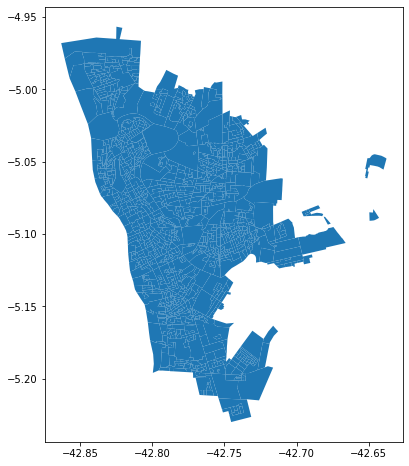

In [14]:
setores_censitarios_urbano_teresina.plot(figsize=(18,8));

In [15]:
setores_censitarios_urbano_teresina.head(2)

CD_SETOR CD_SIT         NM_SIT CD_UF  NM_UF SIGLA_UF   CD_MUN  \
5425  221100105000093      3  Núcleo Urbano    22  Piauí       PI  2211001   
5459  221100105000170      3  Núcleo Urbano    22  Piauí       PI  2211001   

        NM_MUN    CD_DIST   NM_DIST   CD_SUBDIST NM_SUBDIST  \
5425  Teresina  221100105  Teresina  22110010500       None   
5459  Teresina  221100105  Teresina  22110010500       None   

                                               geometry  
5425  POLYGON ((-42.68013 -5.08826, -42.67933 -5.089...  
5459  POLYGON ((-42.63767 -5.04795, -42.63975 -5.055...

## Dados vetoriais

Spatial **vector** data can consist of different types, and the 3 fundamental types are:

<center>
    <img src="./img/simple_features_3_text.svg" width=80%/>
</center>

* **Point**: representa um simples ponto no espaço.
* **Line** ("LineString"): respresenta uma sequência de pontos a partir de uma linha.
* **Polygon** : representa uma área preenchida.

E cada um deles também pode ser combinado em geometrias de várias partes (consulte https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects para uma visão geral).


### A biblioteca `shapely`

Os objetos geométricos individuais são fornecidos pela biblioteca [`shapely`] (https://shapely.readthedocs.io/en/stable/)

In [16]:
from shapely.geometry import Point, LineString, Polygon

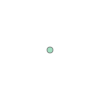

In [17]:
ponto = Point(0.5, 0.5)
ponto

In [18]:
print(ponto)

POINT (0.5 0.5)


In [19]:
type(ponto)

shapely.geometry.point.Point

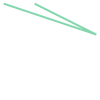

In [20]:
linha = LineString([(0,1),(3,0),(1,1)])
linha

In [21]:
print(linha)

LINESTRING (0 1, 3 0, 1 1)


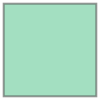

In [22]:
poligono1 = Polygon([(0, 0),(1, 0),(1, 1),(0, 1)])
poligono1

In [23]:
print(poligono1)

POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))


In [25]:
poligono2 = Polygon([(0, 0),(1, 0),(1, 1)])
poligono3 = Polygon([(2, 0),(3, 0),(3, 1),(2, 1)])

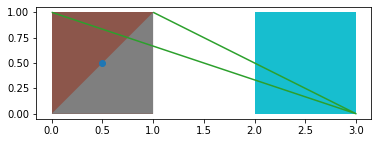

In [26]:
geo_df = gpd.GeoSeries([ponto, linha, poligono1, poligono2, poligono3])
geo_df.plot(cmap="tab10");

In [27]:
geo_df

0                              POINT (0.50000 0.50000)
1    LINESTRING (0.00000 1.00000, 3.00000 0.00000, ...
2    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
3    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
4    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

## Sistemas de referência de coordenadas

Até agora, usamos os dados de geometria com certas coordenadas sem nos perguntarmos mais o que essas coordenadas significam ou como são expressas.

> O **Sistema de Referência de Coordenadas (do inglês, *Coordinate Reference System - CRS* )** relaciona as coordenadas a um local específico na Terra.

Para obter uma boa explicação detalhada, consulte https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

### Coordenadas geográficas

> Graus de latitude e longitude.
>
> Ex. 48 ° 51′N, 2 ° 17′E

O tipo de coordenadas mais conhecido são as coordenadas geográficas: definimos uma posição no globo em graus de latitude e longitude, em relação ao equador e ao meridiano principal.
Com este sistema, podemos facilmente especificar qualquer local na Terra. É amplamente utilizado, por exemplo em GPS. Se você inspecionar as coordenadas de um local no Google Maps, também verá a latitude e a longitude.

**Atenção!**

em Python usamos (lon, lat) e não (lat, lon)

- Longitude: [-180, 180] {{1}}
- Latitude: [-90, 90] {{1}}

### Projeções espaciais

> Coordenadas `(x, y)` são geralmente em metros ou pés

Embora a Terra seja um globo, na prática geralmente a representamos em uma superfície plana: pense em um mapa físico ou nas figuras que fizemos com Python na tela de nosso computador.
Ir do globo para um mapa plano é o que chamamos de *projeção*.


Projetamos a superfície da Terra em um plano 2D para que possamos expressar localizações em coordenadas cartesianas \$x$ e \$y$, em uma superfície plana. Nesse plano, normalmente trabalhamos com uma unidade de comprimento, como metros em vez de graus, o que torna a análise mais conveniente e eficaz.

No entanto, há uma observação importante: a Terra tridimensional nunca pode ser representada perfeitamente em um mapa bidimensional, então as projeções inevitavelmente introduzem distorções. Para minimizar esses erros, existem diferentes projeções, cada uma com vantagens e desvantagens específicas.

A escolha de uma projeção deve se basear na precisão desejada, no impacto sobre o que se pretende analisar e no tipo de dado disponível.

Para este minicurso, utilizaremos $\verb!latlong!$ e $\verb!utm!$ para projeções; $\verb!WGS84!$ e $\verb!GRS80!$ para elipses; e $\verb!WGS84!$, utilizado pelos sistemas de GPS e $\verb!SIRGAS2000!$, oficialmente utilizado pelo Brasil (pois é a melhor representação da América Latina).


## CRS Python / GeoPandas

Um GeoDataFrame ou GeoSeries tem um atributo `.crs` que contém (opcionalmente) uma descrição do sistema de referência de coordenadas das geometrias.

In [28]:
setores_censitarios_urbano_teresina.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

O atributo `.crs` é fornecido como um dicionário. Nesse caso, indica apenas o código EPSG, mas também pode conter a string "proj4" completa (na forma de dicionário).

Possível representação CRS:

- **string `proj4`**
  
   Exemplo: `+ proj = longlat + datum = WGS84 + no_defs`

   Ou sua representação dict: `{'proj': 'longlat', 'datum': 'WGS84', 'no_defs': True}`

- **código EPSG**
  
   Exemplo: `EPSG: 4326` = WGS84 geográfico CRS (longitude, latitude)
  
- Representação Well-Know-Text (WKT) (melhor suporte vindo com PROJ6 na próxima versão do GeoPandas)

Veja, por exemplo, https://epsg.io/4326

Por dentro, o GeoPandas usa as bibliotecas `pyproj`/` PROJ` para lidar com as reprojeções.

Para obter mais informações, consulte http://geopandas.readthedocs.io/en/latest/projections.html.

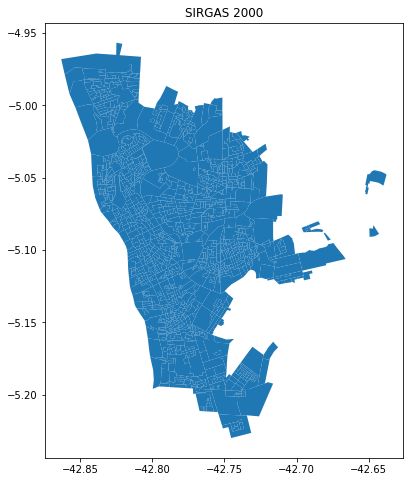

In [29]:
ax = setores_censitarios_urbano_teresina.plot(figsize=(18,8))
ax.set_title(setores_censitarios_urbano_teresina.crs.name);

### Reprojeção do CRS para projeção Mercator.

Podemos converter um GeoDataFrame para outro sistema de referência usando a função `to_crs`.

Por exemplo, vamos converter para a projeção World Mercator (http://epsg.io/3395):

In [30]:
setores_censitarios_urbano_teresina = (
    setores_censitarios_urbano_teresina.to_crs('EPSG:3395')
)

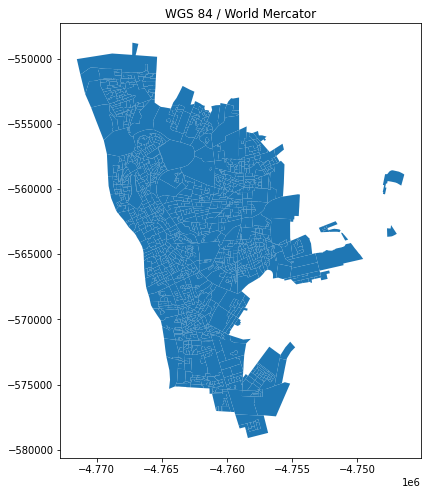

In [31]:
ax = setores_censitarios_urbano_teresina.plot(figsize=(18,8))
ax.set_title(setores_censitarios_urbano_teresina.crs.name);

In [32]:
# Retornando ao CRS original

setores_censitarios_urbano_teresina = setores_censitarios_urbano_teresina.to_crs(
    setores_censitarios_pi.crs
)

setores_censitarios_urbano_teresina.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Por que usar um CRS diferente?

Às vezes, há boas razões para você querer alterar o sistema de referências de coordenadas do seu conjunto de dados, por exemplo:

- Fontes diferentes com CRS diferentes -> necessidade de converter para o mesmo crs

     ```python
    df1 = geopandas.read_file(...)
    df2 = geopandas.read_file(...)

    df2 = df2.to_crs(df1.crs)
    ```

- Mapeamento (distorção de forma e distâncias)

- Cálculos baseados em distância / área -> certifique-se de usar um sistema de coordenadas projetadas apropriado expresso em uma unidade significativa, como metros ou pés (não graus).

<div class = "alert alert-info" style = "font-size: 120%">

**ATENÇÃO:**

Todos os cálculos que acontecem no geopandas e na lib shapely assumem que seus dados estão em um plano cartesiano 2D, e assim o resultado desses cálculos só estará correto se seus dados forem devidamente projetados.

</div>

## Relações espaciais

Um aspecto importante dos dados geoespaciais é que podemos olhar para *relações espaciais*: como dois objetos espaciais se relacionam (se eles se sobrepõem, se cruzam, se contêm um ao outro, por exemplo).

As relações topológicas e teóricas de conjuntos em GIS são normalmente baseadas no modelo DE-9IM. Consulte https://en.wikipedia.org/wiki/Spatial_relation para obter mais informações.


In [33]:
line = LineString([(0, 1), (4, 1)])

ax = gpd.GeoSeries(line).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

In [34]:
buffer = line.buffer(0.5)

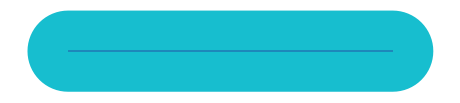

In [36]:
ax = gpd.GeoSeries([line, buffer]).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

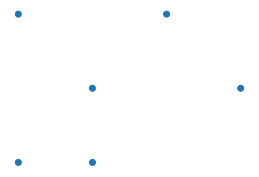

In [37]:
from shapely.geometry import MultiPoint

p1 =  MultiPoint([(0, 0), (0, 2), (1, 0), (1, 1), (2, 2), (3, 1)])

ax = gpd.GeoSeries(p1).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

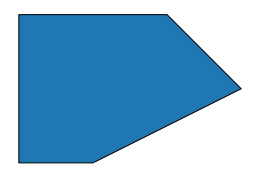

In [38]:
ax = gpd.GeoSeries(p1).convex_hull.plot(edgecolor='black', cmap="tab10", figsize=(8,3))
ax.set_axis_off();

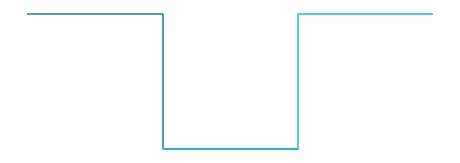

In [41]:
line1 = LineString([(1, 2), (2, 2), (2, 1), (3, 1)])
line2 = LineString([(2, 1), (3, 1), (3, 2), (4, 2)])

ax = gpd.GeoSeries([line1, line2]).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

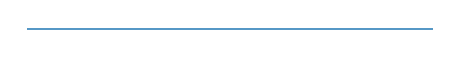

In [42]:
intersect = line1.intersection(line2)

ax = gpd.GeoSeries(intersect).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

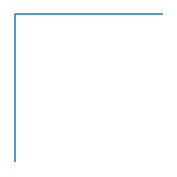

In [44]:
diferent = line2.difference(line1)

ax = gpd.GeoSeries(diferent).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

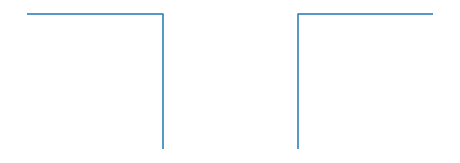

In [45]:
sym_difference = line1.symmetric_difference(line2)

ax = gpd.GeoSeries(sym_difference).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

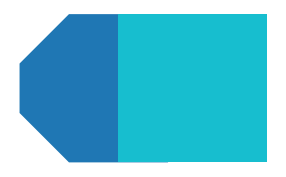

In [46]:
p1 = Polygon([(2, 1), (1, 2), (1, 3), (2, 4), (4, 4), (5, 3), (5, 2), (4, 1)])
p2 = Polygon([(3, 1), (6, 1), (6, 4), (3, 4)])

ax = gpd.GeoSeries([p1, p2]).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

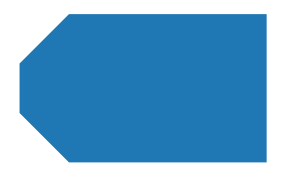

In [47]:
union = p1.union(p2)

ax = gpd.GeoSeries(union).plot(cmap="tab10", figsize=(8,3))
ax.set_axis_off();

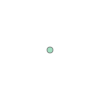

In [49]:
point = Point(0.5,0.5)
point

In [50]:
union.contains(point)

False

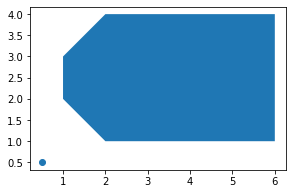

In [53]:
ax = gpd.GeoSeries(union).plot(cmap="tab10", figsize=(8,3))
gpd.GeoSeries(point).plot(ax=ax);

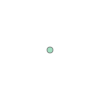

In [54]:
point2 = Point(4,2.5)
point2

In [56]:
union.contains(point2)

True

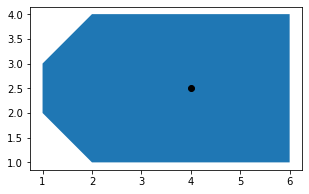

In [59]:
ax = gpd.GeoSeries(union).plot(cmap="tab10", figsize=(8,3))
gpd.GeoSeries(point2).plot(ax=ax, color='black');

<div class = "alert alert-info" style = "font-size: 120%">

**REFERÊNCIA**:

Visão geral das diferentes funções para verificar as relações espaciais (*funções de predicado espacial*):

* `equals`
* `contains`
* `crosses`
* `disjoint`
* `intersects`
* `overlaps`
* `touches`
* `within`
* `covers`


Consulte https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships para uma visão geral desses métodos.

Consulte https://en.wikipedia.org/wiki/DE-9IM para todos os detalhes sobre a semântica dessas operações.

</div>

## Visualização de dados geoespaciais

#### Basic plot

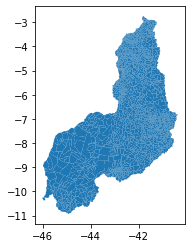

In [61]:
setores_censitarios_pi.plot();

#### Ajustando o tamanho da imagem

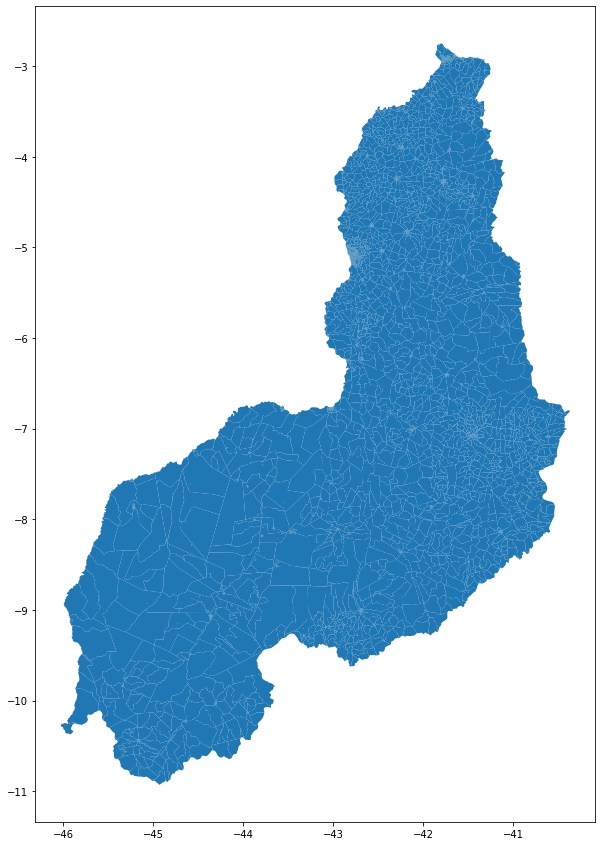

In [63]:
setores_censitarios_pi.plot(figsize=(15, 15));

#### Removendo o box de labels das coordenadas

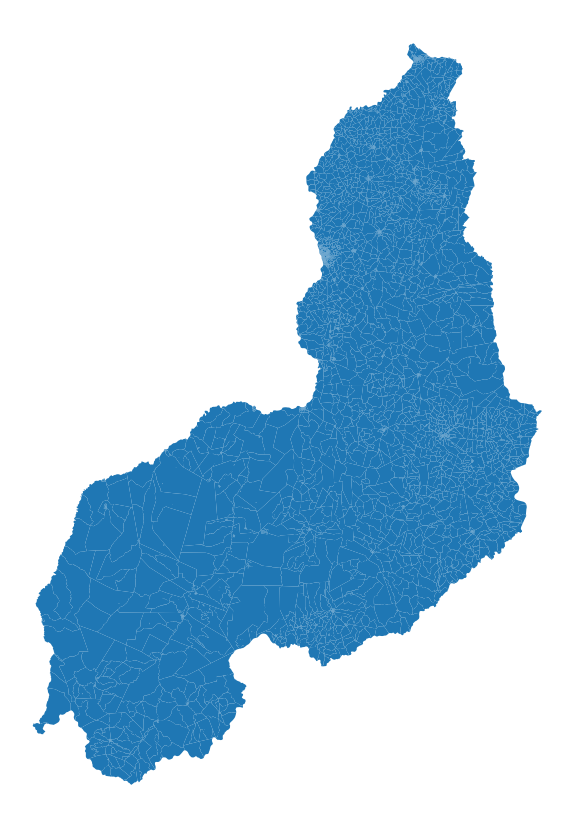

In [64]:
ax = setores_censitarios_pi.plot(figsize=(15, 15))
ax.set_axis_off()

#### Colorindo baseado em uma coluna de valoresColoring based on column values

Vamos primeiro criar uma nova coluna com a área de cada setor censitários:

In [68]:
type(setores_censitarios_pi.geometry[0])

shapely.geometry.polygon.Polygon

In [69]:
setores_censitarios_pi['area'] = (
    setores_censitarios_pi.geometry.area
)

<ipython-input-69-df87f657d7d0>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  setores_censitarios_pi.geometry.area


In [70]:
setores_censitarios_pi.head(2)

CD_SETOR CD_SIT                                        NM_SIT CD_UF  \
0  220005305000001      1  Área Urbana de Alta Densidade de Edificações    22   
1  220005305000002      8            Área Rural (exclusive aglomerados)    22   

   NM_UF SIGLA_UF   CD_MUN NM_MUN    CD_DIST NM_DIST   CD_SUBDIST NM_SUBDIST  \
0  Piauí       PI  2200053  Acauã  220005305   Acauã  22000530500       None   
1  Piauí       PI  2200053  Acauã  220005305   Acauã  22000530500       None   

                                            geometry      area  
0  POLYGON ((-41.08058 -8.21775, -41.08105 -8.218...  0.000043  
1  POLYGON ((-40.85118 -8.17031, -40.85080 -8.170...  0.009517

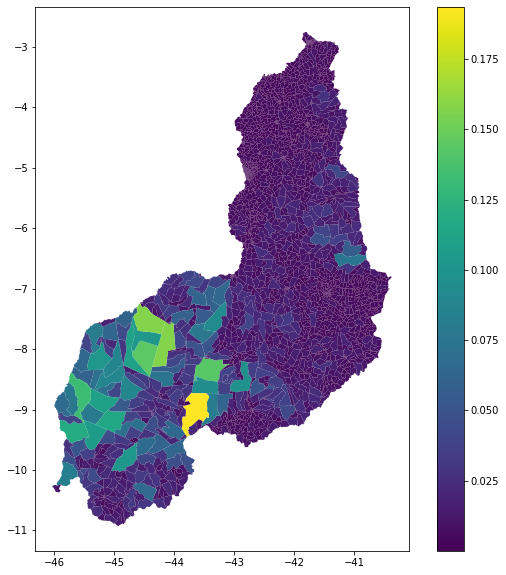

In [72]:
setores_censitarios_pi.plot('area', legend=True, figsize=(10,10));

In [73]:
setores_censitarios_urbano_teresina.head(2)

CD_SETOR CD_SIT         NM_SIT CD_UF  NM_UF SIGLA_UF   CD_MUN  \
5425  221100105000093      3  Núcleo Urbano    22  Piauí       PI  2211001   
5459  221100105000170      3  Núcleo Urbano    22  Piauí       PI  2211001   

        NM_MUN    CD_DIST   NM_DIST   CD_SUBDIST NM_SUBDIST  \
5425  Teresina  221100105  Teresina  22110010500       None   
5459  Teresina  221100105  Teresina  22110010500       None   

                                               geometry  
5425  POLYGON ((-42.68013 -5.08826, -42.67933 -5.089...  
5459  POLYGON ((-42.63767 -5.04795, -42.63975 -5.055...

In [74]:
setores_censitarios_urbano_teresina['area'] = (
    setores_censitarios_urbano_teresina.geometry.area
)
setores_censitarios_urbano_teresina.head(2)

<ipython-input-74-9475e904af7e>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  setores_censitarios_urbano_teresina.geometry.area


CD_SETOR CD_SIT         NM_SIT CD_UF  NM_UF SIGLA_UF   CD_MUN  \
5425  221100105000093      3  Núcleo Urbano    22  Piauí       PI  2211001   
5459  221100105000170      3  Núcleo Urbano    22  Piauí       PI  2211001   

        NM_MUN    CD_DIST   NM_DIST   CD_SUBDIST NM_SUBDIST  \
5425  Teresina  221100105  Teresina  22110010500       None   
5459  Teresina  221100105  Teresina  22110010500       None   

                                               geometry      area  
5425  POLYGON ((-42.68013 -5.08826, -42.67933 -5.089...  0.000009  
5459  POLYGON ((-42.63767 -5.04795, -42.63975 -5.055...  0.000110

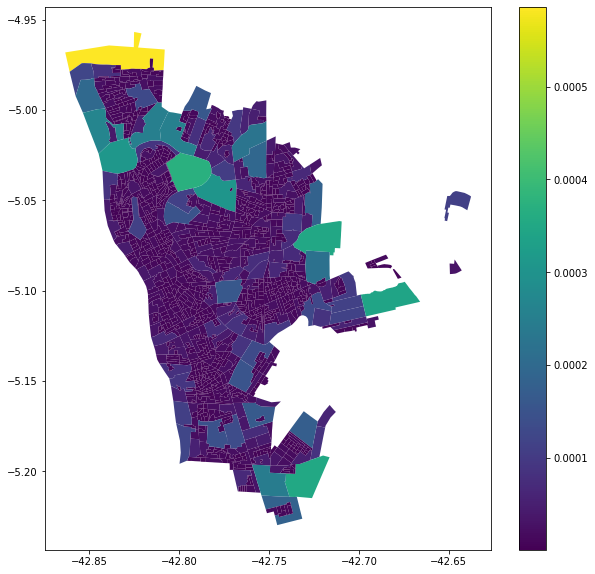

In [75]:
setores_censitarios_urbano_teresina.plot('area', legend=True, figsize=(10,10));

#### Combinando diferentes dataframes em um único gráfico

O método `.plot` retorna um objeto matplotlib Axes, que pode então ser reutilizado para adicionar camadas adicionais ao gráfico com a palavra-chave `ax`:

Como exemplo, vamos determinar os centróides dos setores censitários urbanos de Teresina e *plotá-los* no mesmo mapa.

<ipython-input-77-e03dee1a07fe>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  setores_censitarios_urbano_teresina['geometry'].centroid


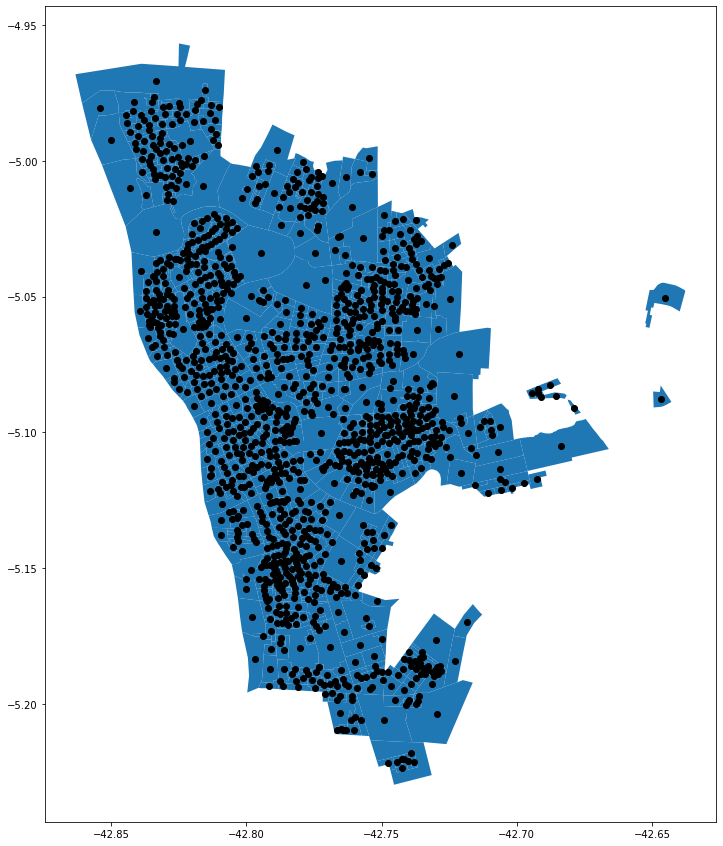

In [77]:
setores_censitarios_urbano_teresina['centroid'] = (
    setores_censitarios_urbano_teresina['geometry'].centroid
)
ax = setores_censitarios_urbano_teresina['geometry'].plot(figsize=(15,15))
setores_censitarios_urbano_teresina['centroid'].plot(ax=ax, color="black");

## Mapas interativos

Outra forma de visualização de dados geoespaciais é através de bibliotecas de visualizações de mapas interativos baseadas na web. Existem várias bibliotecas com essa finalidade.

Utilizaremos a biblioteca Folium, uma biblioteca Python que possibilita a visualização geográfica interativa de dados espaciais através do \$Leaflet.js.
> *Leaflet.js* é uma biblioteca JavaScript de código aberto usada para construir mapas interativos e *mobile-friendly*. Ela utiliza dados do *OpenStreetMaps* para construir a projeção de mapas detalhados contendo informações de vias e demarcações de locais e transportes públicos

In [78]:
import folium

Criando um mapa interativo de Teresina com o *folium*

In [80]:
mapa_teresina = folium.Map(
    location = [-5.088889, -42.801944],
    zoom_start = 12
)
mapa_teresina

### Adicionando um **Marker**

In [83]:
coordenadas_ponte_estaiada = [-5.07087795968628, -42.802653141113474]

folium.Marker(
    coordenadas_ponte_estaiada,
    popup = '<strong>Ponte Estaiada</strong>',
    tooltip='Houver do marker'
).add_to(mapa_teresina)

mapa_teresina

### **Markers** personalizados

In [84]:
folium.Marker(
    location=[-5.0778331015812, -42.82593947402195],
    popup="UESPI",
    icon=folium.Icon(color="green", prefix='fa',icon='university'),
).add_to(mapa_teresina)

folium.Marker(
    location=[-5.06143163033608, -42.79473533169222],
    popup="UFPI",
    icon=folium.Icon(color="red", prefix='glyphicon',icon='home'),
).add_to(mapa_teresina)

mapa_teresina

### Adicionando outras visualizações de mapas

In [85]:
folium.TileLayer('Stamen Terrain').add_to(mapa_teresina)
folium.TileLayer('Stamen Water Color').add_to(mapa_teresina)
folium.TileLayer('cartodbpositron').add_to(mapa_teresina)
folium.LayerControl(collapsed=False).add_to(mapa_teresina)
 
mapa_teresina

### Criando pontos aleatórios contidos nos setores censitários urbanos de Teresina

In [89]:
import random

teresina = setores_censitarios_urbano_teresina.dissolve()
minx, miny, maxx, maxy = teresina.bounds.iloc[0]

cont = 0
colecao_de_pontos = []

while cont < 100:
    p = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
    if teresina.contains(p).iloc[0]:
        colecao_de_pontos.append({
            'latlong': (p.y, p.x),
            'geometry': p
        })
        cont += 1

pontos_aleatorios_teresina = gpd.GeoDataFrame(colecao_de_pontos)
pontos_aleatorios_teresina.crs = setores_censitarios_urbano_teresina.crs
pontos_aleatorios_teresina.head()

latlong                    geometry
0    (-5.11414214293748, -42.71546517056349)  POINT (-42.71547 -5.11414)
1  (-5.095648519469855, -42.807865218417206)  POINT (-42.80787 -5.09565)
2    (-5.13352120365252, -42.79601366508093)  POINT (-42.79601 -5.13352)
3   (-5.063093173046745, -42.74317665869131)  POINT (-42.74318 -5.06309)
4   (-5.003676568528229, -42.80581950693439)  POINT (-42.80582 -5.00368)

### Adicionando esse conjunto de pontos ao mapa interativo

In [90]:
mapa_teresina = folium.Map(
  location=[-5.088889, -42.801944], 
  zoom_start = 12,
)

folium.GeoJson(
    pontos_aleatorios_teresina,
    marker= folium.Marker(
        icon=folium.Icon(
            color="black", 
            prefix='fa',
            icon='bug'
        )
    )
).add_to(mapa_teresina)

mapa_teresina

### Agrupando *markers*

In [91]:
from folium.plugins import MarkerCluster

mapa_teresina = folium.Map(
  location=[-5.088889, -42.801944], 
  zoom_start = 12,
)

marker_cluster = MarkerCluster().add_to(mapa_teresina)

folium.GeoJson(
    pontos_aleatorios_teresina,
    marker= folium.Marker(
        icon=folium.Icon(
            color="black", 
            prefix='fa',
            icon='bug'
        )
    )
).add_to(marker_cluster)

mapa_teresina

### *HeatMaps*

In [92]:
from folium.plugins import HeatMap

mapa_teresina = folium.Map(
  location=[-5.088889, -42.801944], 
  zoom_start = 12,
)

HeatMap(pontos_aleatorios_teresina['latlong'].tolist()).add_to(mapa_teresina)
mapa_teresina

### Mapas Coropléticos

In [93]:
#Retirando a coluna com os centroids
setores_censitarios_urbano_teresina.drop('centroid', axis=1, inplace=True)

In [94]:
setores_censitarios_urbano_teresina.head(2)

CD_SETOR CD_SIT         NM_SIT CD_UF  NM_UF SIGLA_UF   CD_MUN  \
5425  221100105000093      3  Núcleo Urbano    22  Piauí       PI  2211001   
5459  221100105000170      3  Núcleo Urbano    22  Piauí       PI  2211001   

        NM_MUN    CD_DIST   NM_DIST   CD_SUBDIST NM_SUBDIST  \
5425  Teresina  221100105  Teresina  22110010500       None   
5459  Teresina  221100105  Teresina  22110010500       None   

                                               geometry      area  
5425  POLYGON ((-42.68013 -5.08826, -42.67933 -5.089...  0.000009  
5459  POLYGON ((-42.63767 -5.04795, -42.63975 -5.055...  0.000110

In [95]:
from branca.colormap import linear

mapa_teresina = folium.Map(
  location=[-5.088889, -42.801944], 
  zoom_start = 12,
)

colormap = linear.YlOrRd_04.scale(
    setores_censitarios_urbano_teresina['area'].min(), setores_censitarios_urbano_teresina['area'].max()
)

colormap.caption = "Escala de Cor para Área dos Setores Censitários"
colormap.add_to(mapa_teresina)

area_dict = setores_censitarios_urbano_teresina.set_index("CD_SETOR")["area"]

folium.GeoJson(
    setores_censitarios_urbano_teresina,
    name="area",
    style_function = lambda feature: {
        "fillColor": colormap(area_dict[feature['properties']["CD_SETOR"]]),
        "color": "black",
        "weight": 1,
        "dashArray": "5, 5",
        "fillOpacity": 0.3,
    },
).add_to(mapa_teresina)

mapa_teresina

#### Mapa coroplético com o folium

In [96]:
mapa_teresina = folium.Map(
  location=[-5.088889, -42.801944], 
  zoom_start = 12,
)

folium.Choropleth(
    geo_data = setores_censitarios_urbano_teresina,
    data = setores_censitarios_urbano_teresina[["CD_SETOR", "area"]],
    columns = ["CD_SETOR", "area"],
    key_on = "feature.properties.CD_SETOR",
    fill_color = "YlOrRd",
    fill_opacity = 0.3,
    legend_name = "Escala de Cor para Área dos Setores Censitários",
).add_to(mapa_teresina)

mapa_teresina

## Mapa com acidentes de trânsito

In [97]:
acidentes_df = pd.read_csv('datatran2020.csv', encoding='latin-1', sep=';')
acidentes_df.head(2)

id data_inversa    dia_semana   horario  uf     br     km  \
0  260031.0   2020-01-01  quarta-feira  01:00:00  TO  153.0  678,1   
1  260036.0   2020-01-01  quarta-feira  01:00:00  RJ  116.0    178   

     municipio                causa_acidente              tipo_acidente  ...  \
0       GURUPI              Animais na Pista    Atropelamento de Animal  ...   
1  NOVA IGUACU  Falta de Atenção do Pedestre  Atropelamento de Pedestre  ...   

  feridos_graves ilesos ignorados feridos veiculos      latitude  \
0              5      0         0       5        1  -11,77460203   
1              0      1         0       0        1  -22,75223028   

      longitude  regional  delegacia       uop  
0  -49,10744996     SR-TO   UOP01/TO       NaN  
1   -43,4379103     SR-RJ     DEL5/1  UOP02/RJ  

[2 rows x 30 columns]

In [99]:
acidentes_piaui_df = acidentes_df.query("uf == 'PI'")
acidentes_piaui_df.head(2)

id data_inversa    dia_semana   horario  uf     br     km  \
24   260066.0   2020-01-01  quarta-feira  02:45:00  PI  407.0  445,3   
123  260182.0   2020-01-01  quarta-feira  17:35:00  PI  343.0  320,4   

     municipio               causa_acidente     tipo_acidente  ...  \
24   GEMINIANO  Falta de Atenção à Condução  Colisão traseira  ...   
123      ALTOS               Defeito na Via        Tombamento  ...   

    feridos_graves ilesos ignorados feridos veiculos     latitude  \
24               1      1         0       1        2  -7,21406608   
123              0      0         0       2        1    -5,048756   

        longitude  regional  delegacia       uop  
24   -41,28729306     SR-PI    DEL17/4  UOP01/PI  
123    -42,569283     SR-PI    DEL17/1  UOP01/PI  

[2 rows x 30 columns]

In [100]:
acidentes_piaui_df['municipio'].unique()

array(['GEMINIANO', 'ALTOS', 'FLORIANO', 'PICOS', 'MONTE ALEGRE DO PIAUI',
       'TERESINA', 'BERTOLINIA', 'DOM EXPEDITO LOPES', 'BOM JESUS',
       'PARNAIBA', 'CAPITAO DE CAMPOS', 'MONSENHOR GIL', 'DEMERVAL LOBAO',
       'PIRIPIRI', 'CAXINGO', 'CAMPO MAIOR', 'VALENCA DO PIAUI', 'JAICOS',
       'AGUA BRANCA', 'NAZARE DO PIAUI', 'REGENERACAO',
       'LAGOINHA DO PIAUI', 'CRISTINO CASTRO', 'REDENCAO DO GURGUEIA',
       'PASSAGEM FRANCA DO PIAUI', 'AMARANTE', 'BURITI DOS LOPES',
       'MANOEL EMIDIO', 'SAO JOAO DA FRONTEIRA', 'JERUMENHA',
       'LAGOA DO PIAUI', 'CAMPO GRANDE DO PIAUI', 'SANTA LUZ',
       'SAO GONCALO DO GURGUEIA', 'SAO PEDRO DO PIAUI',
       'SAO JOAO DA VARJOTA', 'SAO RAIMUNDO NONATO', 'ANGICAL DO PIAUI',
       'IPIRANGA DO PIAUI', 'ELESBAO VELOSO', 'SAO FRANCISCO DO PIAUI',
       'ELISEU MARTINS', 'PIRACURUCA', 'ACAUA', 'COCAL DE TELHA',
       'VILA NOVA DO PIAUI', 'OEIRAS', 'PIO IX', 'ALVORADA DO GURGUEIA',
       'CORRENTE', 'LUIS CORREIA', 'INHUMA', 'PA

In [102]:
acidentes_teresina_df = acidentes_piaui_df.query('municipio == "TERESINA"')
acidentes_teresina_df.head(2)

id data_inversa   dia_semana   horario  uf     br   km municipio  \
407  260508.0   2020-01-03  sexta-feira  06:30:00  PI  316.0    9  TERESINA   
433  260538.0   2020-01-03  sexta-feira  09:15:00  PI  316.0  2,4  TERESINA   

                                        causa_acidente    tipo_acidente  ...  \
407                             Ultrapassagem Indevida  Colisão lateral  ...   
433  Desobediência às normas de trânsito pelo condutor  Colisão lateral  ...   

    feridos_graves ilesos ignorados feridos veiculos     latitude  \
407              0      1         0       2        2  -5,17381686   
433              1      1         1       1        3    -5,123238   

        longitude  regional  delegacia       uop  
407  -42,76624952     SR-PI    DEL17/1  UOP02/PI  
433  -42,79601812     SR-PI    DEL17/1  UOP02/PI  

[2 rows x 30 columns]

In [103]:
acidentes_teresina_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 407 to 63435
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      316 non-null    float64
 1   data_inversa            316 non-null    object 
 2   dia_semana              316 non-null    object 
 3   horario                 316 non-null    object 
 4   uf                      316 non-null    object 
 5   br                      315 non-null    float64
 6   km                      315 non-null    object 
 7   municipio               316 non-null    object 
 8   causa_acidente          316 non-null    object 
 9   tipo_acidente           316 non-null    object 
 10  classificacao_acidente  316 non-null    object 
 11  fase_dia                316 non-null    object 
 12  sentido_via             316 non-null    object 
 13  condicao_metereologica  316 non-null    object 
 14  tipo_pista              316 non-null  

In [104]:
#Transformações na latitude e longitude 
acidentes_teresina_df['latitude'] = acidentes_teresina_df['latitude'].apply(lambda lat : float(lat.replace(',','.')))
acidentes_teresina_df['longitude'] = acidentes_teresina_df['longitude'].apply(lambda long : float(long.replace(',','.')))

<ipython-input-104-e5d18d73795f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_teresina_df['latitude'] = acidentes_teresina_df['latitude'].apply(lambda lat : float(lat.replace(',','.')))
<ipython-input-104-e5d18d73795f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_teresina_df['longitude'] = acidentes_teresina_df['longitude'].apply(lambda long : float(long.replace(',','.')))


In [105]:
acidentes_teresina_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 407 to 63435
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      316 non-null    float64
 1   data_inversa            316 non-null    object 
 2   dia_semana              316 non-null    object 
 3   horario                 316 non-null    object 
 4   uf                      316 non-null    object 
 5   br                      315 non-null    float64
 6   km                      315 non-null    object 
 7   municipio               316 non-null    object 
 8   causa_acidente          316 non-null    object 
 9   tipo_acidente           316 non-null    object 
 10  classificacao_acidente  316 non-null    object 
 11  fase_dia                316 non-null    object 
 12  sentido_via             316 non-null    object 
 13  condicao_metereologica  316 non-null    object 
 14  tipo_pista              316 non-null  

In [106]:
#Criando a geometria a patir da latitude e longitude
acidentes_teresina_df['geometry'] = acidentes_teresina_df.apply(
    lambda acidente : Point(acidente.longitude, acidente.latitude), axis=1
)

/home/gesielrios/anaconda3/envs/adg/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
<ipython-input-106-0c090adcb669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_teresina_df['geometry'] = acidentes_teresina_df.apply(


In [107]:
acidentes_teresina_df.head(2)

id data_inversa   dia_semana   horario  uf     br   km municipio  \
407  260508.0   2020-01-03  sexta-feira  06:30:00  PI  316.0    9  TERESINA   
433  260538.0   2020-01-03  sexta-feira  09:15:00  PI  316.0  2,4  TERESINA   

                                        causa_acidente    tipo_acidente  ...  \
407                             Ultrapassagem Indevida  Colisão lateral  ...   
433  Desobediência às normas de trânsito pelo condutor  Colisão lateral  ...   

    ilesos ignorados feridos veiculos  latitude  longitude regional  \
407      1         0       2        2 -5.173817 -42.766250    SR-PI   
433      1         1       1        3 -5.123238 -42.796018    SR-PI   

     delegacia       uop                          geometry  
407    DEL17/1  UOP02/PI  POINT (-42.76624952 -5.17381686)  
433    DEL17/1  UOP02/PI    POINT (-42.79601812 -5.123238)  

[2 rows x 31 columns]

In [108]:
type(acidentes_teresina_df)

pandas.core.frame.DataFrame

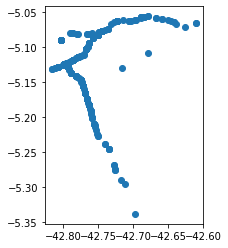

In [109]:
acidentes_teresina_geo_df = gpd.GeoDataFrame(acidentes_teresina_df)
acidentes_teresina_geo_df.crs = setores_censitarios_urbano_teresina.crs
acidentes_teresina_geo_df.plot();

In [110]:
mapa_teresina = folium.Map(
  location=[-5.088889, -42.801944], 
  zoom_start = 12,
)


folium.GeoJson(
    acidentes_teresina_geo_df,
    marker = folium.Marker(
        icon=folium.Icon(
            prefix='fa',
            icon='car'
        )
    ),
    popup = folium.GeoJsonPopup(
        fields = [
            'dia_semana',
            'horario', 
            'causa_acidente', 
            'tipo_acidente', 
            'classificacao_acidente', 
            'fase_dia', 
            'condicao_metereologica'
        ]
    )
).add_to(mapa_teresina)

mapa_teresina

---

__Licensa__

![](img/by-nc.svg)

*This work is licensed under the Creative Commons Attribution-NonCommercial 4.0 International License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.*